# Vázané extrémy

**Definice.**

Nechť je dána reálná funkce $n$ proměnných $f$, množina $M\subseteq\mathbb R^n$ a bod $a\in M\cap D_f.$ Řekneme, že funkce $f$ nabývá v bodě $a$ **vázané lokální minimum (maximum) vzhledem k množině $M$,** existuje-li okolí $U$ bodu $a$ takové, že pro každé $x\in U\cap M$ platí:
$$
    f(a) \le f(x), \ \ (f(x) \le f(a)).
$$
Lze-li uvedené nerovnosti nahradit pro $x\neq a$ ostrými nerovnostmi, potom hovoříme o tzv. **ostrém lokálním minimu (resp. maximu) vzhledem k množině $M$.**

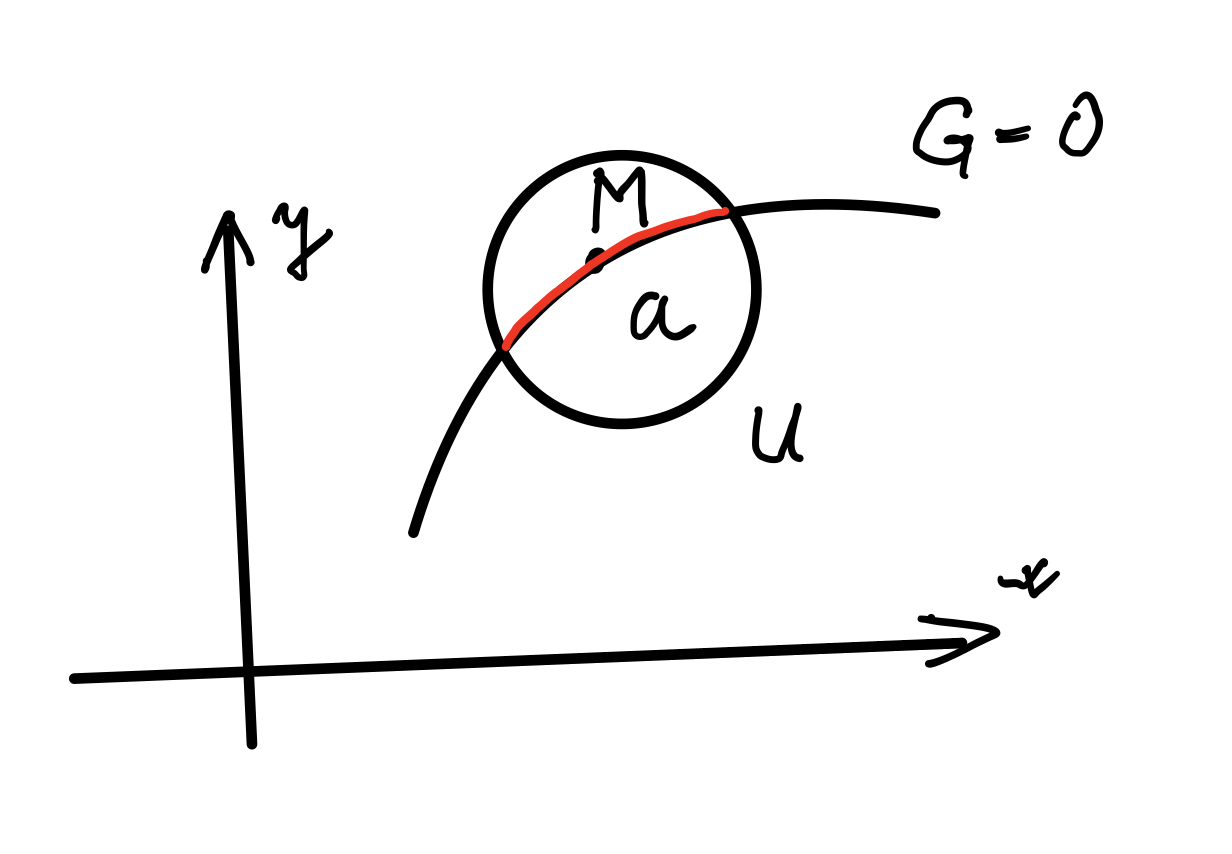

## Nutná podmínka

**Věta.**
Nechť $f,g_1,\ldots,g_s,\ 1\le s < n$ jsou reálnými funkcemi třídy $\textrm{C}^1$ na otevřené množině $U\subseteq\mathbb R^n$ a nechť pro každé $x\in U$ má Jacobiho matice zobrazení $G = (g_1,\ldots,g_s):\mathbb R^n\supset\to\mathbb R$:
$$
\nabla G(x) = \left(
\begin{matrix}
\frac{\partial g_1}{\partial x_1}(x)&\ldots&\frac{\partial g_1}{\partial x_n}(x)\\
\cdots&\cdots&\cdots\\
\frac{\partial g_s}{\partial x_1}(x)&\ldots&\frac{\partial g_s}{\partial x_n}
\end{matrix}
\right)
$$
maximální hodnost $s.$ 

Nechť 
$$
M = \{x\in U: G(x) = 0\} = \{x\in U: g_1(x) = 0,\ldots,g_s(x) = 0\}
$$
a funkce $f$ nabývá v bodě $a\in M$ lokální maximum nebo minimum vzhledem k množině $M.$ Potom existuje právě jedna $s-$tice reálných čísel $(\lambda_1,\ldots,\lambda_s)$ taková, že bod $a$ je stacionárním bodem tzv. **Lagrangeovy funkce**
$$
L(x) = f(x) + \sum_{i=1}^s \lambda_i g_i(x).   
$$

## Příklad
Najděme extrémy funkce $f(x,y) = x^2 + 2y^2$ na kružnici o rovnici $x^2 + y^2 = 1.$

### Řešení

In [2]:
var("x,y")
f(x,y) = x^2 + 2*y^2
g(x,y) = x^2 + y^2 - 1
gradg = g(x,y).gradient()

In [3]:
show("grad(g) = \t", gradg)

'grad(g) = \t' (2*x, 2*y)

Gradient $gradg$ zřejmě spojitě závisí na proměnných $x,y$. Tedy funkce $f,g$ jsou třídy $C^1$ na $\mathbb R^2.$ Dále $gradg \neq \vec 0$ všude mimo počátek.

Dále budeme hledat řešení soustavy:
$$
\nabla f = \lambda \nabla g\\
g = 0.
$$
Tuto soustavu lze rozepsat takto:
$$
    f_x = \lambda g_x\\
    f_y = \lambda g_y \\
    g = 0.
$$

In [4]:
var("λ")
f_x = f(x,y).diff(x)
f_y = f(x,y).diff(y)
g_x = g(x,y).diff(x)
g_y = g(x,y).diff(y)
# definujme rovnice tvořící soustavu
eq1 = f_x == λ * g_x
eq2 = f_y == λ * g_y
eq3 = g == 0
reseni_soustavy = solve([eq1, eq2, eq3], x,y,λ)

In [5]:
reseni_soustavy

[[x == 1, y == 0, λ == 1], [x == -1, y == 0, λ == 1], [x == 0, y == -1, λ == 2], [x == 0, y == 1, λ == 2]]

Funkce $f$ tedy může nabývat vázané lokální extrémy v bodech: $(1,0), (-1,0), (0,-1), (0,1).$

In [6]:
f_vals = {}
for res in reseni_soustavy:
    val = f(x=res[0].rhs(), y=res[1].rhs())
    f_vals.update({(res[0].rhs(), res[1].rhs()): val})
#max_val = max(f_vals)
#min_val = min(f_vals)

In [7]:
f_vals

{(1, 0): 1, (-1, 0): 1, (0, -1): 2, (0, 1): 2}

<b>Odpověď.</b>
Funkce $f$ tedy nabývá na jednotkové kružnici maximum $f(0,\pm 1) = 2$ a minimum $f(\pm 1, 0) = 1.$

In [8]:
var("t")
p1 = parametric_plot3d((cos(t), sin(t), f(x=cos(t), y=sin(t))), (t, 0, 2*pi), color="red", thickness=5)
p2 = parametric_plot3d((cos(t), sin(t), 0), (t, 0, 2*pi), color="green")
p3 = plot3d(f(x,y), (x,-1,1), (y,-1,1), color="pink")  
p4 = point3d([(0, -1, 2), (0, 1, 2), (-1, 0, 1), (1,0,1)], size=30)
(p1 + p2 + p3 + p4).show()

Graphics3d Object

In [0]:
# Nakresleme si vrstevnice účelové funkce
# a vazbové funkce g:
p1  = contour_plot(f(x,y), (x, -1, 1), (y, -1, 1), contours=[1, 2], fill=False, axes=True, labels=True)
p2 = contour_plot(g(x,y), (x, -1, 1), (y, -1, 1), contours=1, axes=True, fill=False)
p3 = points([(-1,0), (1,0), (0,-1), (0,1)], color="red", size=30)
(p1 + p2 + p3).show()

## Postačující podmínky existence vázaného extrému

**Věta (Weierstrass).**
Nechť $f:\mathbb R^n\supset\to\mathbb R$ je funkce spojitá na omezené a uzavřené množině $D\subseteq\mathbb R^n.$ Potom funkce nabývá na množině $D$ svého absolutního maxima i minima.

**Věta.**
Předpokládejme, že funkce $f,g_1\ldots,g_s:\mathbb R^n\supset\to\mathbb R$ $(1\le s < n)$ jsou třídy $\textrm{C}^2$ na otevřené množině $U\subseteq\mathbb R^n$ a nechť v každém bodě $x\in U$ má Jacobiho matice vektorové funkce $G=(g_1,\ldots,g_s):\mathbb R^\supset\to\mathbb R$ 
$$
\nabla G(x) = \left(
\begin{matrix}
\frac{\partial g_1}{\partial x_1}(x)&\ldots&\frac{\partial g_1}{\partial x_n}(x)\\
\cdots&\cdots&\cdots\\
\frac{\partial g_s}{\partial x_1}(x)&\ldots&\frac{\partial g_s}{\partial x_n}
\end{matrix}
\right)
$$
maximální hodnost $s$. Dále nechť $a\in M,$ a $(\lambda_1,\ldots,\lambda_s)\in\mathbb R^s$ kde
$$
M = \{(x,y)\in U:\ G(x) = 0\}=\{(x,y)\in U:\ g_1(x) = 0,\ldots,g_s(x) = 0\}.
$$
a nechť $a$ je stacionárním bodem Lagrangeovy funkce:
$$
L(x) = f(x) + \sum_{i=1}^s \lambda_i g_i(x).   
$$
Položme dále:
$$
T_a(M) = Lin\{\nabla g_1(a),\ldots,\nabla g_s(a)\}^{\bot}
$$


a) Je-li kvadratická forma $d^2L_a$ na podprostoru $T_a(M)$ pozitivně definitní, pak funkce $f$ nabývá v bodě $a$ ostré lokální minimum vzhledem k množině $M.$

b) Je-li kvadratická forma $d^2L_a$ negativně definitní na podprostoru $T_a(M),$ pak funkce $f$ nabývá v bodě $a$ ostré lokální maximum vzhledem k množině $M.$

c) Je-li kvadratická forma $d^2L_a$ indefinitní na podprostoru $T_a(M),$ pak funkce $f$ v bodě $a$ nenabývá lokální extrém vzhledem k množině $M.$

# Cvičení

a) Najděte vázané extrémy funkce $f(x,y) = xy$ s vazbou $x^2 +y^2 = 2.$

b) Rozložte číslo 64 na tři činitele, jejichž součet je minimální.

c) Najděte na sféře o rovnici $x^2 + y^2 + z^2 = 4$ body, které jsou nejbližší a nejvzdálenější od pevně zvoleného bodu $(3, 1, -1).$

d) Řešte pomocí metody Lagrangeových multiplikátorů následující úlohu, která byla již dříve řešena bez použití této metody:

má se vyrobit kartónová krabice hranolového tvaru z celkem 12 $m^2$ kartónu o maximálním možném objemu.